In [5]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [6]:
pip install keras_preprocessing

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [7]:
TRAIN_DTR = "C:/Users/riyau/Downloads/archive (3)/images/train"
TEST_DTR = "C:/Users/riyau/Downloads/archive (3)/images/test"

In [8]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label,"completed")
    return image_paths,labels   

In [9]:
train = pd.DataFrame()
train['image'], train["labels"] = createdataframe(TRAIN_DTR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [10]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [11]:
print(train)

                                                   image    labels
0      C:/Users/riyau/Downloads/archive (3)/images/tr...     angry
1      C:/Users/riyau/Downloads/archive (3)/images/tr...     angry
2      C:/Users/riyau/Downloads/archive (3)/images/tr...     angry
3      C:/Users/riyau/Downloads/archive (3)/images/tr...     angry
4      C:/Users/riyau/Downloads/archive (3)/images/tr...     angry
...                                                  ...       ...
28816  C:/Users/riyau/Downloads/archive (3)/images/tr...  surprise
28817  C:/Users/riyau/Downloads/archive (3)/images/tr...  surprise
28818  C:/Users/riyau/Downloads/archive (3)/images/tr...  surprise
28819  C:/Users/riyau/Downloads/archive (3)/images/tr...  surprise
28820  C:/Users/riyau/Downloads/archive (3)/images/tr...  surprise

[28821 rows x 2 columns]


In [12]:
test = pd.DataFrame()
test['image'], test["labels"] = createdataframe(TEST_DTR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [13]:
print(test)
print(test['image'])

                                                  image    labels
0     C:/Users/riyau/Downloads/archive (3)/images/te...     angry
1     C:/Users/riyau/Downloads/archive (3)/images/te...     angry
2     C:/Users/riyau/Downloads/archive (3)/images/te...     angry
3     C:/Users/riyau/Downloads/archive (3)/images/te...     angry
4     C:/Users/riyau/Downloads/archive (3)/images/te...     angry
...                                                 ...       ...
7061  C:/Users/riyau/Downloads/archive (3)/images/te...  surprise
7062  C:/Users/riyau/Downloads/archive (3)/images/te...  surprise
7063  C:/Users/riyau/Downloads/archive (3)/images/te...  surprise
7064  C:/Users/riyau/Downloads/archive (3)/images/te...  surprise
7065  C:/Users/riyau/Downloads/archive (3)/images/te...  surprise

[7066 rows x 2 columns]
0       C:/Users/riyau/Downloads/archive (3)/images/te...
1       C:/Users/riyau/Downloads/archive (3)/images/te...
2       C:/Users/riyau/Downloads/archive (3)/images/te...
3       C

In [14]:
from tqdm.notebook import tqdm
    
    

In [15]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale = True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [16]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

C:\Users\riyau\AppData\Roaming\Python\Python311\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [17]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [18]:
x_train = train_features/255.0   #pixels highest value 255
x_test = test_features/255.0

In [19]:
pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le = LabelEncoder()
le.fit(train['labels'])

LabelEncoder()

In [36]:
y_train = le.transform(train['labels'])
y_test = le.transform(test['labels'])

In [37]:
y_train = to_categorical(y_train,num_classes=7)
y_test = to_categorical(y_test,num_classes=7)

In [38]:
model = Sequential()
model.add(Conv2D(128,kernel_size=(3,3),activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))


          
          
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))
          
#output layer
model.add(Dense(7,activation='softmax'))          




In [39]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')

In [40]:
model.fit(x=x_train,y=y_train,batch_size=128,epochs=100,validation_data = (x_test,y_test))

Epoch 1/100
226/226 [==============================] - 902s 4s/step - loss: 1.8185 - accuracy: 0.2430 - val_loss: 1.7877 - val_accuracy: 0.2569
Epoch 2/100
226/226 [==============================] - 915s 4s/step - loss: 1.7635 - accuracy: 0.2659 - val_loss: 1.6905 - val_accuracy: 0.3051
Epoch 3/100
226/226 [==============================] - 1060s 5s/step - loss: 1.6346 - accuracy: 0.3448 - val_loss: 1.4826 - val_accuracy: 0.4406
Epoch 4/100
226/226 [==============================] - 905s 4s/step - loss: 1.4985 - accuracy: 0.4133 - val_loss: 1.4126 - val_accuracy: 0.4694
Epoch 5/100
226/226 [==============================] - 864s 4s/step - loss: 1.4276 - accuracy: 0.4454 - val_loss: 1.2950 - val_accuracy: 0.5105
Epoch 6/100
226/226 [==============================] - 859s 4s/step - loss: 1.3817 - accuracy: 0.4649 - val_loss: 1.2656 - val_accuracy: 0.5130
Epoch 7/100
226/226 [==============================] - 877s 4s/step - loss: 1.3473 - accuracy: 0.4827 - val_loss: 1.2326 - val_accuracy

KeyboardInterrupt: 

In [54]:
import json
from tensorflow.keras.models import model_from_json

# Assuming you have already defined the 'model' object

# Convert the model architecture to JSON format
model_json = model.to_json()

# Define the name of the JSON file
json_file_name = "emotionaldetector.json"

# Write the model JSON to the file 'emotionaldetector.json'
with open(json_file_name, 'w') as json_file:
    json_file.write(model_json)

# Save the model weights to an h5 file
model.save('emotionaldetector.h5')

# Now, to load the model back with the saved JSON architecture and weights
# Load the model architecture from the JSON file
with open(json_file_name, 'r') as json_file:
    loaded_model_json = json_file.read()

# Create a new model with the loaded JSON architecture
loaded_model = model_from_json(loaded_model_json)

# Load the model weights from the h5 file
loaded_model.load_weights('emotionaldetector.h5')
  

C:\Users\riyau\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [55]:
from keras.models import model_from_json

In [56]:
import json
from tensorflow.keras.models import model_from_json

# Assuming you have already defined the 'model' object

# Define the name of the JSON file
json_file_name = "emotionaldetector.json"

# Read the model architecture from the existing JSON file
with open(json_file_name, 'r') as json_file:
    model_json = json_file.read()

# Load the model architecture from the JSON data
model = model_from_json(model_json)

# Load the model weights from the h5 file
model.load_weights('emotionaldetector.h5')


In [59]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [60]:
def ef(image):
    img = load_img(image,grayscale = True)
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of angry
1/1 [==============================] - 1s 1s/step
model prediction is angry


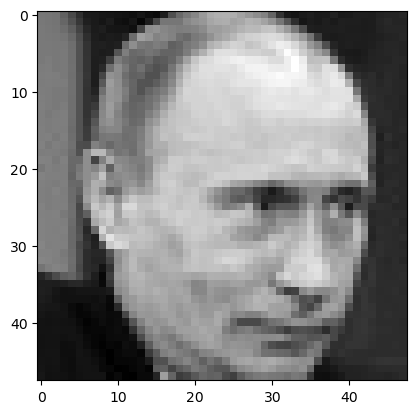

In [74]:
image = 'C:/Users/riyau/Downloads/archive (3)/images/test/angry/65.jpg'
print('original image is of angry')
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print('model prediction is', pred_label)
plt.imshow(img.reshape(48,48) ,cmap='gray')

original image is of angry
1/1 [==============================] - 0s 244ms/step
model prediction is angry


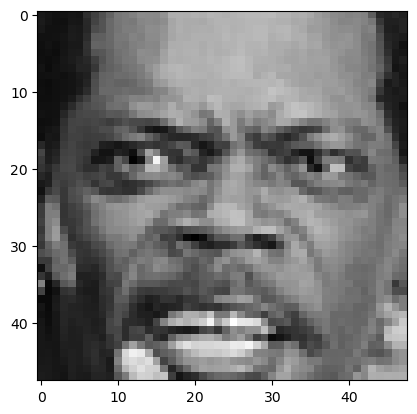

In [80]:
image = 'C:/Users/riyau/Downloads/archive (3)/images/train/angry/10.jpg'
print('original image is of angry')
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print('model prediction is', pred_label)
plt.imshow(img.reshape(48,48) ,cmap='gray')

original image is of fear
1/1 [==============================] - 0s 37ms/step
model prediction is fear


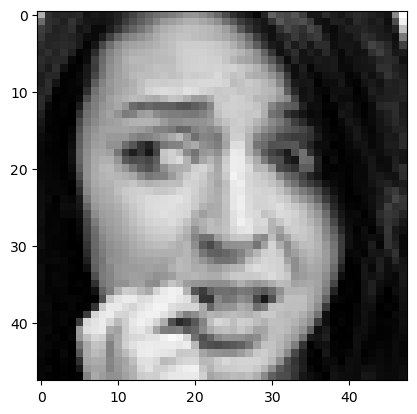

In [82]:
image = 'C:/Users/riyau/Downloads/archive (3)/images/test/fear/21.jpg'
print('original image is of fear')
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print('model prediction is', pred_label)
plt.imshow(img.reshape(48,48) ,cmap='gray')